In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming you have a CSV file with the data, replace 'your_csv_file.csv' with your actual CSV file name.
csv_filename = 'ScanCenH2_Proba_0.8_polymerasecount_0_F_10_newpolyproba_0.01.csv'
df = pd.read_csv(csv_filename)
df

,Time Steps,A in gene,CenHsize,Burst Frequency
0,1,4,15,0.1
1,201,3,15,0.1
2,401,6,15,0.1
3,601,5,15,0.1
4,801,6,15,0.1
...,...,...,...,...
319995,99001,1,30,1.0
319996,99201,2,30,1.0
319997,99401,2,30,1.0
319998,99601,1,30,1.0


In [6]:
# Calculate mean and std for every 500 rows
means = []
stds = []

for i in range(0, len(df), 500):
    subset = df.iloc[i:i+500]
    mean_A = subset['A in gene'].mean()
    std_A = subset['A in gene'].std()
    means.append(mean_A)
    stds.append(std_A)



In [7]:
means = np.array(means).repeat(500)
stds = np.array(stds).repeat(500)

/Users/adrienberard/opt/anaconda3/envs/myenv2/lib/python3.12/site-packages/seaborn/axisgrid.py:123: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self._figure.tight_layout(*args, **kwargs)


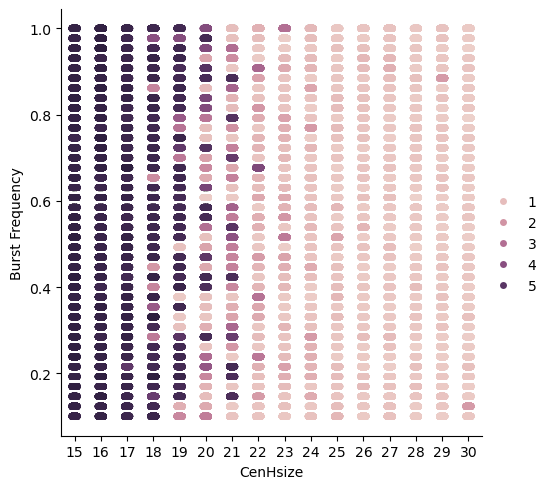

In [8]:
sns.catplot(data = df, x = "CenHsize",y="Burst Frequency",hue = means, errorbar = stds)

In [ ]:
df.insert(3,"MeanA",means)

In [ ]:
df.insert(4,"StdA",stds)

In [27]:
df.drop("A in gene",axis = 1)


,Time Steps,MeanA,StdA,CenHsize,Burst Frequency
0,1,5.71,0.931469,15,0.1
1,201,5.71,0.931469,15,0.1
2,401,5.71,0.931469,15,0.1
3,601,5.71,0.931469,15,0.1
4,801,5.71,0.931469,15,0.1
...,...,...,...,...,...
319995,99001,0.66,1.046226,30,1.0
319996,99201,0.66,1.046226,30,1.0
319997,99401,0.66,1.046226,30,1.0
319998,99601,0.66,1.046226,30,1.0


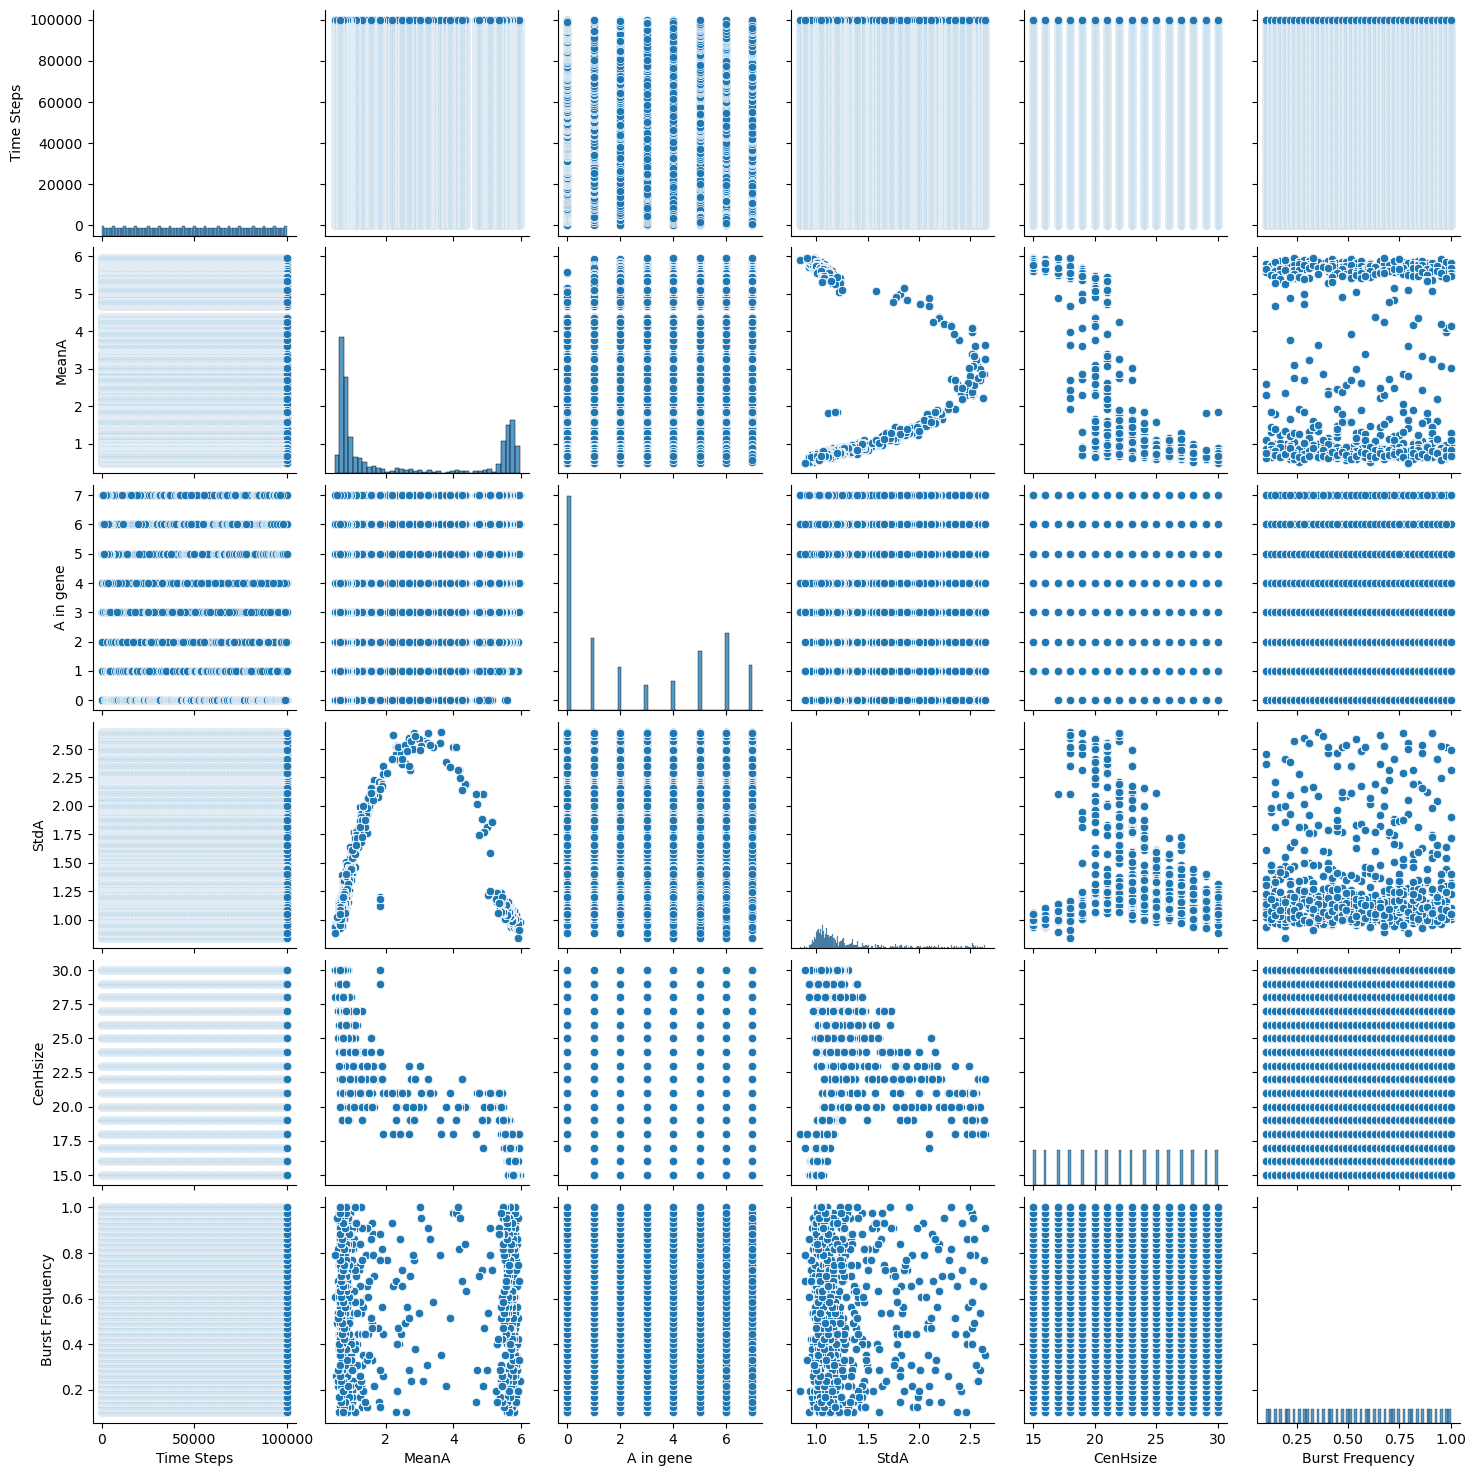

In [28]:
sns.pairplot(data = df)


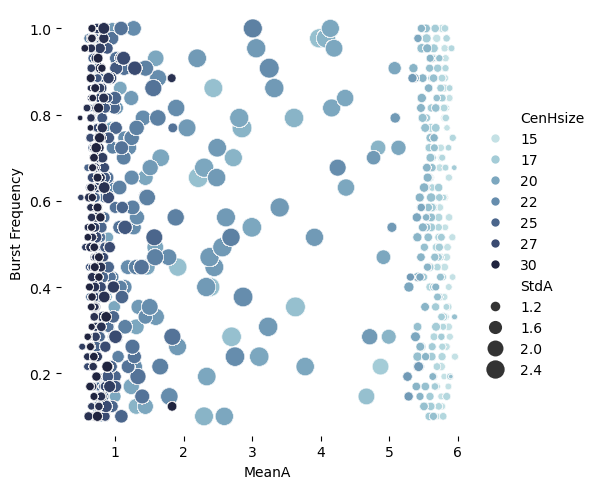

In [30]:

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=df,
    x="MeanA", y="Burst Frequency",
    hue="CenHsize", size="StdA",
    palette=cmap, sizes=(10, 200),
)
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

